<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [3]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('bmh')

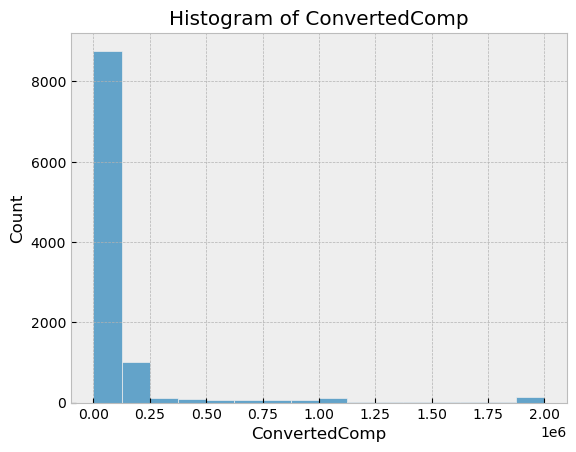

In [4]:
# define query
QUERY = """
SELECT ConvertedComp
  FROM master
"""

# run query
df = pd.read_sql_query(QUERY, conn)

# plot graph
sns.histplot(data = df,
             x = 'ConvertedComp',
             bins = 16)
plt.title('Histogram of ConvertedComp')
plt.show()

### Box Plots


Plot a box plot of `Age.`


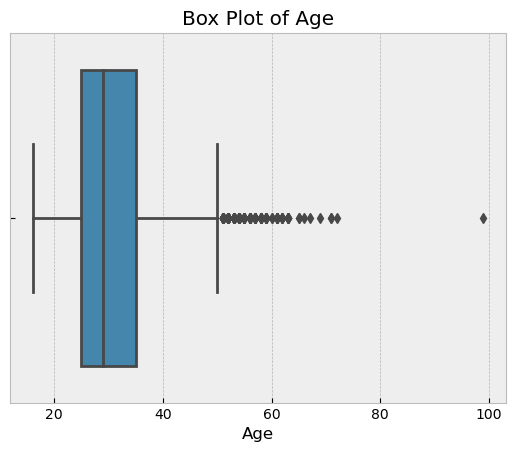

In [5]:
# define query
QUERY = """
SELECT Age
  FROM master
"""

# run query
df = pd.read_sql_query(QUERY, conn)

# plot graph
sns.boxplot(data = df,
            x = 'Age')
plt.title('Box Plot of Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


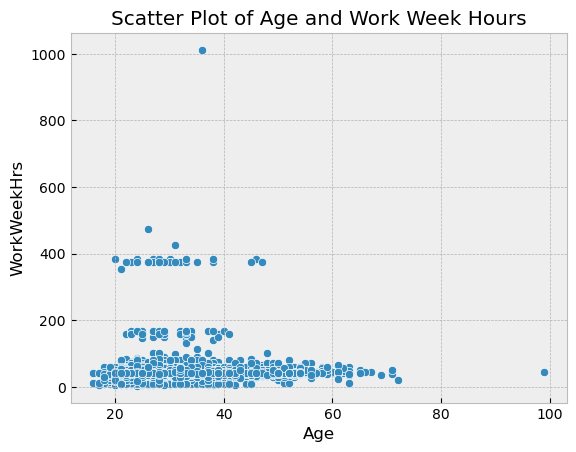

In [6]:
# define query
QUERY = """
SELECT Age,
       WorkWeekHrs
  FROM master
"""

# run query
df = pd.read_sql_query(QUERY, conn)

# plot graph
sns.scatterplot(data = df,
                y = 'WorkWeekHrs',
                x = 'Age')
plt.title('Scatter Plot of Age and Work Week Hours')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


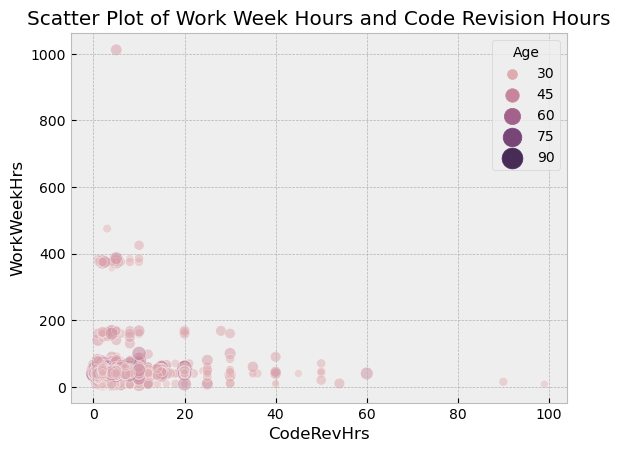

In [7]:
# define query
QUERY = """
SELECT Age,
       WorkWeekHrs,
       CodeRevHrs
  FROM master
"""

# run query
df = pd.read_sql_query(QUERY, conn)

# plot graph
sns.scatterplot(data = df,
                y = 'WorkWeekHrs',
                x = 'CodeRevHrs',
                hue = 'Age',
                size = 'Age',
                alpha = 0.5,
                sizes = (10, 250))
plt.title('Scatter Plot of Work Week Hours and Code Revision Hours')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


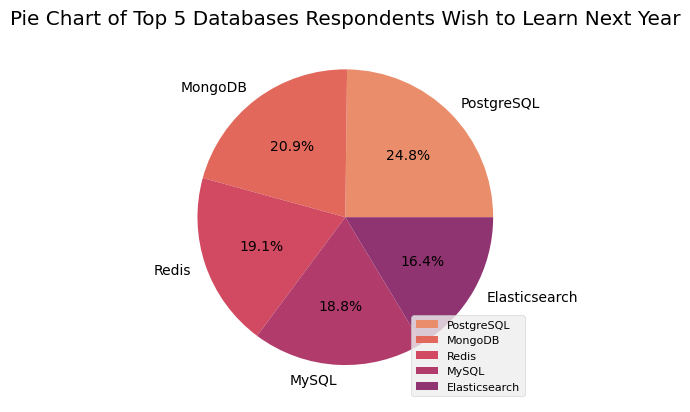

count
DatabaseDesireNextYear       
PostgreSQL               4328
MongoDB                  3649
Redis                    3331
MySQL                    3281
Elasticsearch            2856

In [8]:
# define query
QUERY = """
  SELECT DatabaseDesireNextYear,
         COUNT(*) AS count
    FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
   LIMIT 5
"""

# run query
df = pd.read_sql_query(QUERY,conn)
df.set_index('DatabaseDesireNextYear',
             inplace = True)

# plot graph
plt.title("Pie Chart of Top 5 Databases Respondents Wish to Learn Next Year")
plt.pie(x = df['count'],  # Set wedge sizes
        labels = df.index, # Set label
        colors = sns.color_palette("flare"), # Define color scheme
        autopct = '%1.1f%%') # Label each wedge
plt.legend(labels = df.index,
           loc = 'lower right',
           prop = {'size': 8})
plt.show()

df.head()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


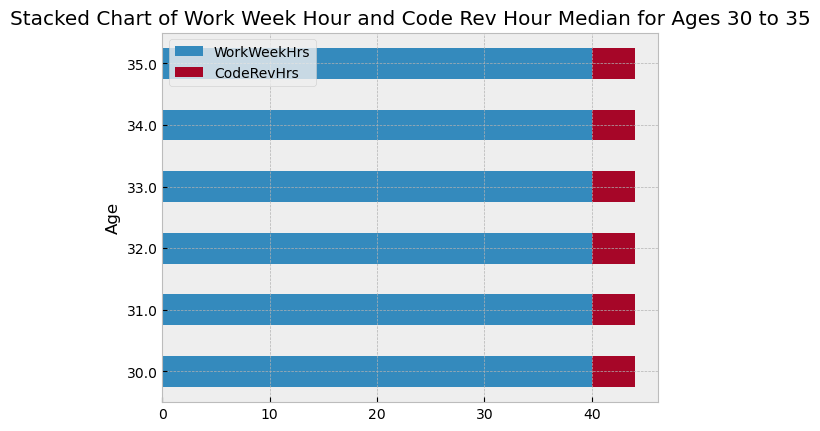

In [9]:
# define query
QUERY = """
  SELECT WorkWeekHrs,
         CodeRevHrs,
         Age
    FROM master
   WHERE Age BETWEEN 30 AND 35
"""

# run query
df = pd.read_sql_query(QUERY,conn)
df = df.groupby('Age').median()

# plot graph
df.plot(kind = 'barh',
        stacked = True)
plt.title('Stacked Chart of Work Week Hour and Code Rev Hour Median for Ages 30 to 35')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


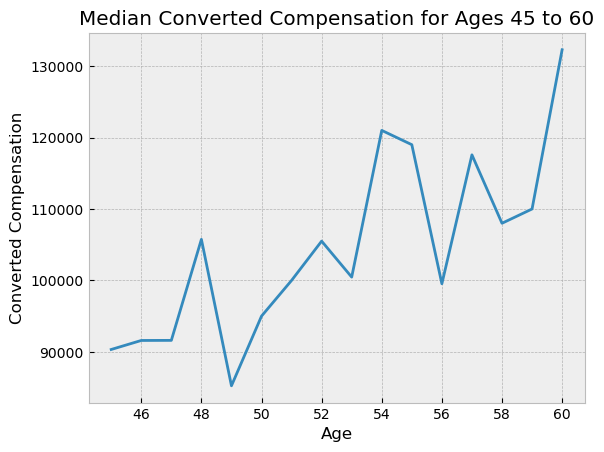

In [10]:
# define query
QUERY = """
  SELECT ConvertedComp,
         Age
    FROM master
   WHERE Age BETWEEN 45 AND 60
"""

# run query
df = pd.read_sql_query(QUERY,conn)
df = df.groupby('Age').median()

# plot graph
plt.plot(df)
plt.title('Median Converted Compensation for Ages 45 to 60')
plt.ylabel('Converted Compensation')
plt.xlabel('Age')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


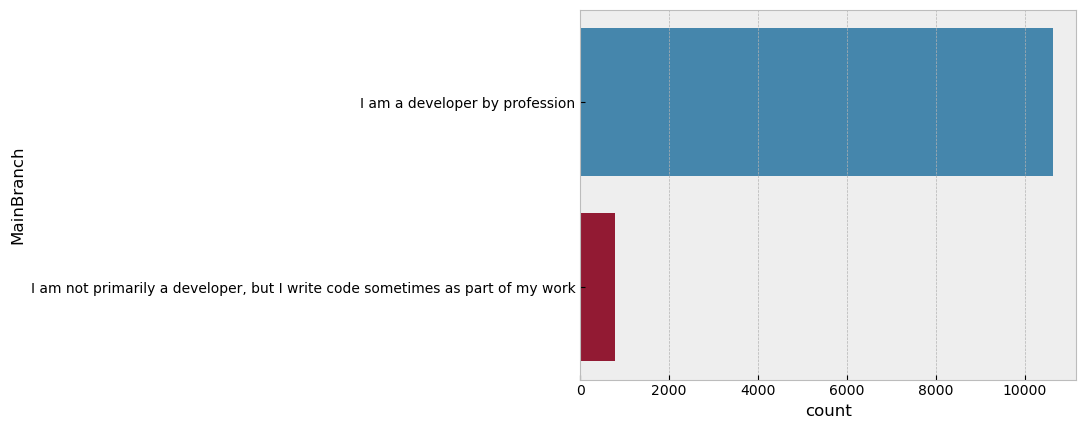

In [11]:
# define query
QUERY = """
  SELECT MainBranch,
         COUNT(*) AS count
    FROM master
GROUP BY MainBranch
"""

# run query
df = pd.read_sql_query(QUERY,conn)

# plot graph
sns.barplot(
    data = df,
    x = 'count',
    y = 'MainBranch')
plt.show()

Close the database connection.


In [12]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
